


**RAW DATASET INSIGHTS**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv("infolimpioavanzadoTarget.csv")


Shape, columns, missing values,stats :

In [ ]:
print("Shape (rows, columns):", df.shape)


Shape (rows, columns): (1238, 1285)


In [ ]:
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              N

In [ ]:
print(df.dtypes)


date                 object
open                float64
high                float64
low                 float64
close               float64
                     ...   
stochastic-kd-15    float64
volumenrelativo     float64
diff                float64
INCREMENTO          float64
TARGET              float64
Length: 1285, dtype: object


In [ ]:
print(df.isna().sum().head(20))

date                0
open                0
high                0
low                 0
close               0
adjclose            0
volume              0
ticker              0
RSIadjclose15      75
RSIvolume15        75
RSIadjclose25     125
RSIvolume25       125
RSIadjclose50     250
RSIvolume50       250
MACDadjclose15    125
MACDvolume15      125
MACDadjclose25    125
MACDvolume25      125
MACDadjclose50    125
MACDvolume50      125
dtype: int64


In [ ]:
main_cols = ["open", "high", "low", "close", "adjclose", "volume"]
print("\nSummary stats for main price columns:")
print(df[main_cols].describe())


Summary stats for main price columns:
              open         high          low        close     adjclose  \
count  1238.000000  1238.000000  1238.000000  1238.000000  1238.000000   
mean    138.152411   140.654650   135.521673   138.099947   136.748949   
std     220.945922   224.400176   217.104894   220.822991   218.003734   
min       1.050000     1.150000     0.820000     1.090000     1.090000   
25%       2.400000     2.496250     2.300000     2.350000     2.350000   
50%      15.735000    16.020000    15.527500    15.720000    15.720000   
75%     115.827501   119.639999   112.003748   115.885000   115.885000   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  
count  1.238000e+03  
mean   4.498021e+05  
std    5.256546e+05  
min    2.120000e+03  
25%    8.262000e+04  
50%    2.462500e+05  
75%    6.756500e+05  
max    4.144400e+06  


Time-series plots: price & volume over time

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

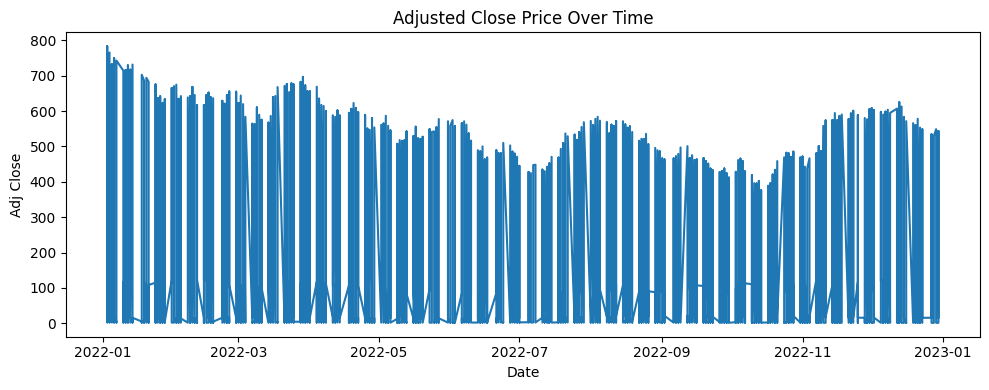

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["adjclose"])
plt.title("Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.tight_layout()
plt.show()

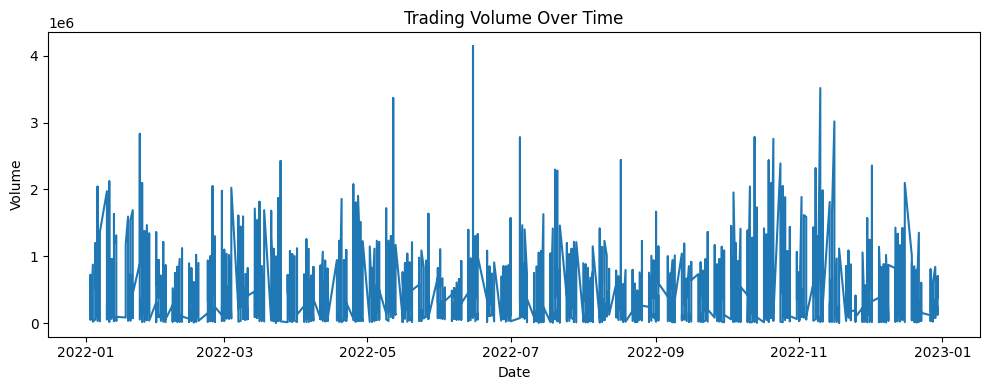

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["volume"])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

**Distribution of daily returns**
(how volatile is this?)

In [ ]:
df["return_pct"] = df["adjclose"].pct_change() * 100


In [ ]:
returns = df["return_pct"].dropna()


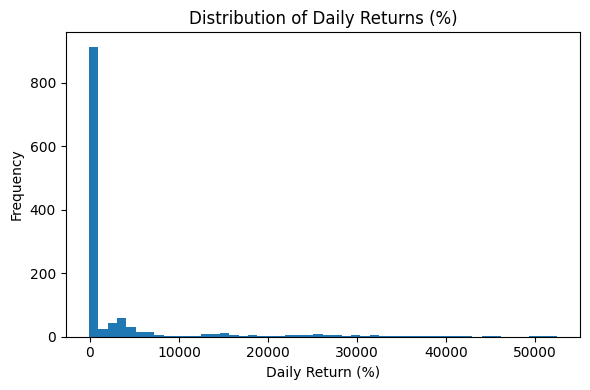

In [ ]:
#Histogram (returns):
plt.figure(figsize=(6, 4))
plt.hist(returns, bins=50)
plt.title("Distribution of Daily Returns (%)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
print("\nDaily return stats:")
print(returns.describe())


Daily return stats:
count     1237.000000
mean      3205.447678
std       8114.475844
min        -99.786240
25%        -91.178053
50%          0.000000
75%       1168.376128
max      52405.297879
Name: return_pct, dtype: float64


**Correlation between basic price variables**

In [ ]:
main_cols = ["open", "high", "low", "close", "adjclose", "volume"]

corr = df[main_cols].corr()
print("\nCorrelation between main columns:")
print(corr)


Correlation between main columns:
              open      high       low     close  adjclose    volume
open      1.000000  0.999855  0.999854  0.999582  0.999549  0.694973
high      0.999855  1.000000  0.999862  0.999835  0.999804  0.698540
low       0.999854  0.999862  1.000000  0.999830  0.999810  0.693666
close     0.999582  0.999835  0.999830  1.000000  0.999981  0.697743
adjclose  0.999549  0.999804  0.999810  0.999981  1.000000  0.698126
volume    0.694973  0.698540  0.693666  0.697743  0.698126  1.000000


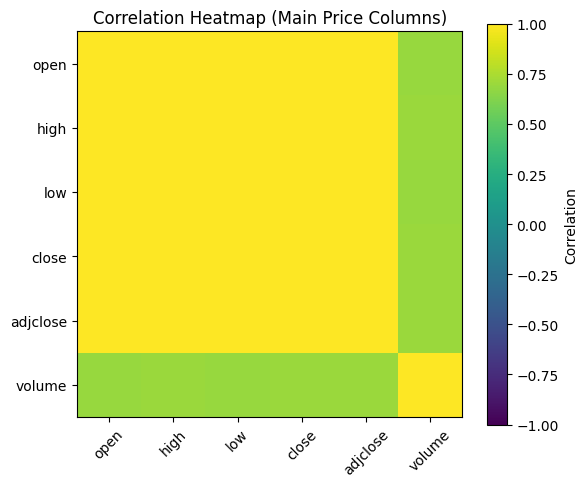

In [ ]:
plt.figure(figsize=(6, 5))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(main_cols)), main_cols, rotation=45)
plt.yticks(range(len(main_cols)), main_cols)
plt.title("Correlation Heatmap (Main Price Columns)")
plt.tight_layout()
plt.show()

In [ ]:
print("\nTARGET value counts:")
print(df["TARGET"].value_counts())


TARGET value counts:
TARGET
0.0    952
1.0    285
Name: count, dtype: int64


In [ ]:

df["target"] = df["adjclose"].shift(-1)
df = df.dropna(subset=["target"])


**Target distribution” for regression**

In [ ]:
print("\nTarget (next day's adjclose) stats:")
print(df["target"].describe())


Target (next day's adjclose) stats:
count    1237.000000
mean      136.845141
std       218.065621
min         1.090000
25%         2.350000
50%        15.720000
75%       115.900002
max       783.376221
Name: target, dtype: float64


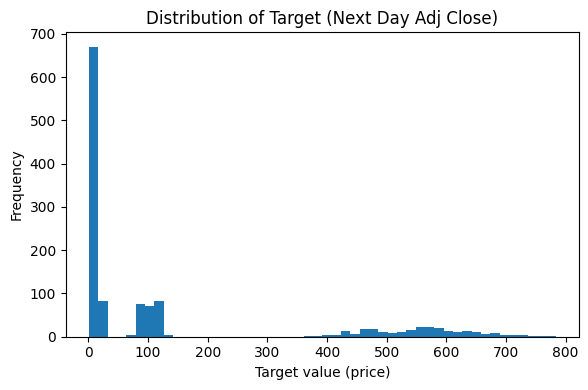

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df["target"], bins=50)
plt.title("Distribution of Target (Next Day Adj Close)")
plt.xlabel("Target value (price)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()